## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [0]:
%tensorflow_version 2.x



In [0]:
import tensorflow as tf

In [234]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [236]:
class_names=['T-shirt','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot',]
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [237]:
x_train.shape

(60000, 28, 28)

In [238]:
x_test.shape

(10000, 28, 28)

###5. Find dimensions of an image in the dataset

In [239]:
x_train.shape[1:3]

(28, 28)

### 6. Verify if existing labels/Classes are correct 

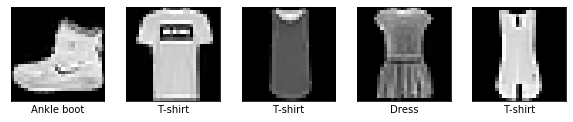

In [240]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train1 = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test1 = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [242]:
y_train1.shape

(60000, 10)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
import sklearn
import numpy as np

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [0]:
x_train_scaled=np.subtract(x_train,np.min(x_train))/np.subtract(np.max(x_train),np.min(x_train))

In [0]:
x_test_scaled=np.subtract(x_test,np.min(x_test))/np.subtract(np.max(x_test),np.min(x_test))

In [247]:
np.max(x_train_scaled)

1.0

In [248]:
np.max(x_test_scaled)

1.0

In [249]:
np.min(x_train_scaled)

0.0

In [250]:
np.min(x_test_scaled)

0.0

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_train_scaled1 = tf.keras.backend.expand_dims(
    x_train_scaled,
    axis=-1
)

In [252]:
x_train_scaled1.shape

TensorShape([60000, 28, 28, 1])

In [0]:
x_test_scaled1 = tf.keras.backend.expand_dims(
    x_test_scaled,
    axis=-1
)

In [254]:
x_test_scaled1.shape

TensorShape([10000, 28, 28, 1])

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
#model.add(tf.keras.layers.BatchNormalization())

###10. Import the necessary layers from keras to build the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,1)))


### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [263]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [264]:
#Train the model
model.fit(x_train_scaled1,y_train1,          
          validation_data=(x_test_scaled1,y_test1),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 1.4120 - accuracy: 0.5380 - val_loss: 1.0346 - val_accuracy: 0.5648
Epoch 2/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.9089 - accuracy: 0.5776 - val_loss: 0.8334 - val_accuracy: 0.5897
Epoch 3/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.7645 - accuracy: 0.6269 - val_loss: 0.7444 - val_accuracy: 0.6485
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.6379 - accuracy: 0.7321 - val_loss: 0.5826 - val_accuracy: 0.8093
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4369 - accuracy: 0.8981 - val_loss: 0.4310 - val_accuracy: 0.8953
Epoch 6/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3089 - accuracy: 0.9338 - val_loss: 0.3836 - val_accuracy: 0.9031
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,1)))

In [0]:
#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Flatten the output
model2.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

In [0]:
#Dense layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [273]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [274]:
#Train the model
model2.fit(x_train_scaled1,y_train1,          
          validation_data=(x_test_scaled1,y_test1),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 1.5786 - accuracy: 0.4009 - val_loss: 1.2300 - val_accuracy: 0.4922
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 1.0514 - accuracy: 0.5390 - val_loss: 0.9087 - val_accuracy: 0.6058
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.8063 - accuracy: 0.6622 - val_loss: 0.7495 - val_accuracy: 0.6871
Epoch 4/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.6591 - accuracy: 0.7376 - val_loss: 0.5601 - val_accuracy: 0.8008
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4679 - accuracy: 0.8181 - val_loss: 0.4746 - val_accuracy: 0.8147
Epoch 6/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4058 - accuracy: 0.8368 - val_loss: 0.4409 - val_accuracy: 0.8322
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [275]:
model2.evaluate(x_test_scaled1,y_test1)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.2912 - accuracy: 0.9182


[0.2911566174030304, 0.9182]

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_scaled1)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

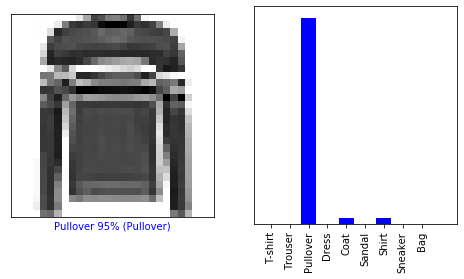

In [277]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [0]:
datagen.fit(x_train_scaled1)

In [280]:
model2.fit_generator(datagen.flow(x_train_scaled1, y_train1, batch_size=32),
                    steps_per_epoch=len(x_train_scaled1) / 32, epochs=10)

  ...
    to  
  ['...']
Train for 1875.0 steps
Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3130 - accuracy: 0.0999
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3035 - accuracy: 0.0965
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3035 - accuracy: 0.0976
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3034 - accuracy: 0.0997
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3035 - accuracy: 0.0977
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 2.3034 - accuracy: 0.0984
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3035 - accuracy: 0.0978
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3033 - accuracy: 0.1016
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3032 - accuracy: 0.1001
Epoch 10/10
1875

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

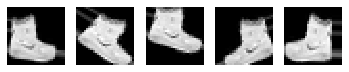

In [282]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_scaled1[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()